Proyecto E - Visor

# Exploración y preparación de datos (Calidad de datos)

## Importar librerías

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import openpyxl

## Cargar los datos

In [12]:
landis0_path = "/content/etsmartmeter_AGOSTO_2025-08-01_a_2025-08-31_1_hora.xlsx"
landis1_path = "/content/etsmartmeter_AGOSTO_2025-08-01_a_2025-08-31_1_hora.xlsx"
landis2_path = "/content/etsmartmeter_SEPTIEMBRE_2025-09-01_a_2025-09-30_1_hora.xlsx"
landis3_path = "/content/etsmartmeter_OCTUBRE_2025-10-01_a_2025-10-23_1_hora.xlsx"
df0 = pd.read_excel(landis0_path)
df1 = pd.read_excel(landis1_path)
df2 = pd.read_excel(landis2_path)
df3 = pd.read_excel(landis3_path)
df1.head()

,time_index_colombia,entity_id,v1,activeenergyimport,v2,relativethdvoltage,totalpowerfactor,activepower,reactiveenergyimport,reactiveenergyexport,v3,relativethdcurrent,reactivepower
0,2025-08-01 00:00:00,SmartMeter_SM_B10_ARQ,124.84,77411230.0,126.22,1.731,0.92,7687.2,77982170.0,699774.0,124.99,4.145,2778.0
1,2025-08-01 01:00:00,SmartMeter_SM_B10_ARQ,124.80,77418660.0,126.38,1.533,0.88,6876.7,77985580.0,699774.0,125.21,3.756,3505.0
2,2025-08-01 02:00:00,SmartMeter_SM_ECOVILLA,112.69,6979993.5,140.21,13.673,0.81,329.4,297412.6,4504210.0,129.32,4.441,215.0
3,2025-08-01 03:00:00,SmartMeter_SM_ECOVILLA,113.08,6980340.0,140.74,13.463,0.83,352.2,297412.6,4504427.0,129.62,4.983,217.0
4,2025-08-01 04:00:00,SmartMeter_SM_ECOVILLA,112.20,6980678.5,140.37,13.240,0.83,354.7,297412.6,4504643.0,129.03,4.979,216.0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time_index_colombia   744 non-null    datetime64[ns]
 1   entity_id             626 non-null    object        
 2   v1                    626 non-null    float64       
 3   activeenergyimport    626 non-null    float64       
 4   v2                    626 non-null    float64       
 5   relativethdvoltage    626 non-null    float64       
 6   totalpowerfactor      626 non-null    float64       
 7   activepower           626 non-null    float64       
 8   reactiveenergyimport  626 non-null    float64       
 9   reactiveenergyexport  626 non-null    float64       
 10  v3                    626 non-null    float64       
 11  relativethdcurrent    626 non-null    float64       
 12  reactivepower         626 non-null    float64       
dtypes: datetime64[ns](1)

## Integración de datasets

In [14]:
import pandas as pd

dfs = [df0, df1, df2, df3]  # todos tienen las columnas iguales
df = pd.concat(dfs, ignore_index=True)
#quita duplicados exactos (mismo medidor y timestamp)
if {'entity_id','time_index_colombia'}.issubset(df.columns):
    #ver los posibles duplicados, se asumen como duplicados los que tienen mismo 'entity_id' y 'time_index_colombia'!
    duplicados = df[df.duplicated(subset=['entity_id','time_index_colombia'], keep=False)]
    print(f"Duplicados con mismo 'entity_id' y 'time_index_colombia': {len(duplicados)}")
    df = df.drop_duplicates(subset=['entity_id','time_index_colombia'])


Duplicados con mismo 'entity_id' y 'time_index_colombia': 1488


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time_index_colombia   2016 non-null   datetime64[ns]
 1   entity_id             1874 non-null   object        
 2   v1                    1872 non-null   float64       
 3   activeenergyimport    1872 non-null   float64       
 4   v2                    1872 non-null   float64       
 5   relativethdvoltage    1872 non-null   float64       
 6   totalpowerfactor      1872 non-null   float64       
 7   activepower           1872 non-null   float64       
 8   reactiveenergyimport  1872 non-null   float64       
 9   reactiveenergyexport  1872 non-null   float64       
 10  v3                    1872 non-null   float64       
 11  relativethdcurrent    1872 non-null   float64       
 12  reactivepower         1872 non-null   float64       
dtypes: datetime64[ns](1), f

In [16]:
#Códigos de bloques identificados en el dataset
df['entity_id'].unique()
#Validar que no haya duplicados ni bloques faltantes!

array(['SmartMeter_SM_B10_ARQ', 'SmartMeter_SM_ECOVILLA',
       'SmartMeter_SM_B9_SFA2', nan, 'SmartMeter_SM_B5_BACH',
       'SmartMeter_SM_B15_BIBL', 'SmartMeter_SM_B12_DERE',
       'SmartMeter_SM_B8_LABS', 'SmartMeter_SM_B7_CTIC',
       'SmartMeter_SM_B8_CPA', 'SmartMeter_SM_B4_PRIM',
       'SmartMeter_SM_B3_RECT', 'SmartMeter_SM_B9_SFA1',
       'SmartMeter_SM_B17_POLI', 'SmartMeter_SM_B18_PARQ'], dtype=object)

In [17]:
#Formato de fecha y hora de la variable, y zona horaria de 'time_index_colombia'
df['time_index_colombia'] = pd.to_datetime(df['time_index_colombia'], errors='coerce', utc=True)
df['time_index_colombia'] = df['time_index_colombia'].dt.tz_convert('America/Bogota')

In [18]:
df['time_index_colombia'].head()

,time_index_colombia
0,2025-07-31 19:00:00-05:00
1,2025-07-31 20:00:00-05:00
2,2025-07-31 21:00:00-05:00
3,2025-07-31 22:00:00-05:00
4,2025-07-31 23:00:00-05:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype                         
---  ------                --------------  -----                         
 0   time_index_colombia   2016 non-null   datetime64[ns, America/Bogota]
 1   entity_id             1874 non-null   object                        
 2   v1                    1872 non-null   float64                       
 3   activeenergyimport    1872 non-null   float64                       
 4   v2                    1872 non-null   float64                       
 5   relativethdvoltage    1872 non-null   float64                       
 6   totalpowerfactor      1872 non-null   float64                       
 7   activepower           1872 non-null   float64                       
 8   reactiveenergyimport  1872 non-null   float64                       
 9   reactiveenergyexport  1872 non-null   float64                       
 10  v3   

In [20]:
# Exportar el datos integrados a csv
output_path = "C:\\Users\\danig\\OneDrive\\Documentos\\GitHub\\E-Visor\\data_integrada\\datos_integrados.csv"
df.to_csv(output_path)
print(f"Datos exportados a: {output_path}")

Datos exportados a: C:\Users\danig\OneDrive\Documentos\GitHub\E-Visor\data_integrada\datos_integrados.csv


## Limpieza de datos
1. Corrección del tipo de datos
2. Estadística descriptiva
3. Limpieza de datos atípicos
4. Limpieza de datos nulos

 Transformaciones


### 1. Corrección del tipo de dato

In [21]:
#Correción del tipo de datos
df['entity_id'] = df['entity_id'].astype("category")

### 2. Estadística descriptiva

In [22]:
df. describe()

,v1,activeenergyimport,v2,relativethdvoltage,totalpowerfactor,activepower,reactiveenergyimport,reactiveenergyexport,v3,relativethdcurrent,reactivepower
count,1872.000000,1.872000e+03,1872.000000,1872.000000,1872.000000,1872.000000,1.872000e+03,1.872000e+03,1872.000000,1872.000000,1872.000000
mean,119.153889,4.834796e+07,130.778152,7.016953,0.884824,9071.936271,4.609078e+07,4.272732e+06,126.411677,8.117503,2179.074786
std,5.975044,4.103126e+07,7.200288,5.786279,0.089400,13208.349884,4.016552e+07,8.292121e+06,2.576558,5.766260,2880.178647
min,106.190000,3.119700e+03,119.730000,0.707000,0.400000,200.000000,2.974126e+05,2.817000e+03,115.430000,0.653000,6.000000
25%,112.890000,7.576650e+06,124.770000,1.751750,0.800000,333.150000,2.977482e+05,6.997870e+05,124.720000,4.274000,199.000000
50%,122.385000,4.880459e+07,126.440000,3.022500,0.910000,4912.550000,7.833659e+07,6.998930e+05,126.190000,5.074500,1407.000000
75%,124.462500,8.909051e+07,139.120000,13.673000,0.970000,13577.100000,8.210078e+07,4.706259e+06,128.632500,10.862500,3005.750000
max,131.530000,9.999309e+07,141.970000,15.028000,0.990000,129868.600000,9.983222e+07,7.512415e+07,131.340000,40.164000,16588.000000


#### 2.1. Gráfica de variables

Text(0.5, 1.0, 'Medidores (entity_id)')

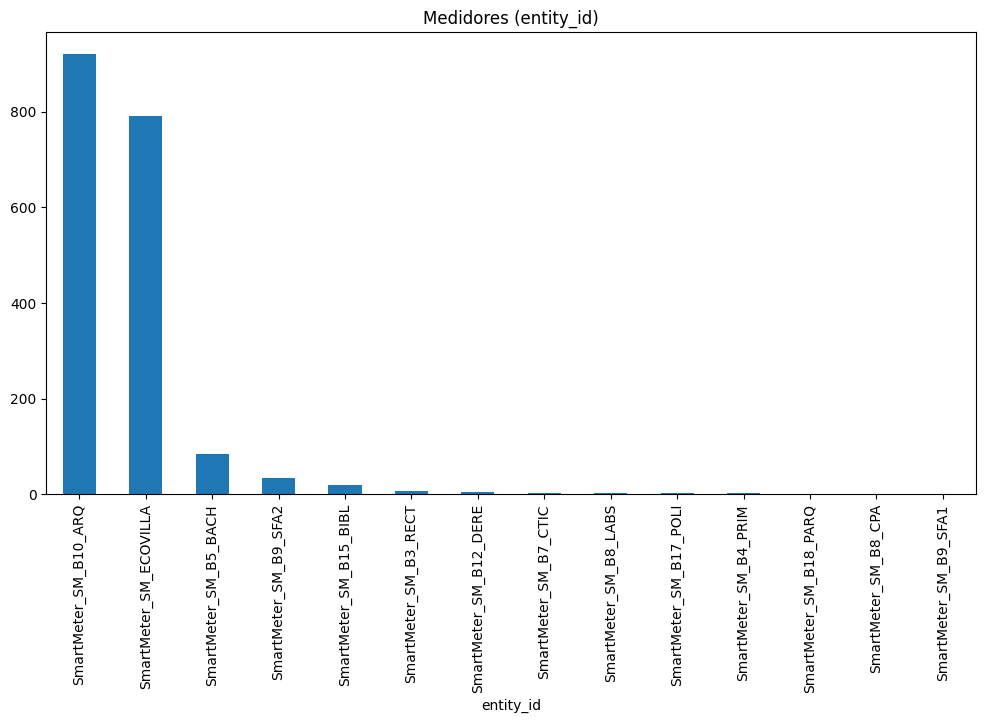

In [23]:
#Variables categóricas
df['entity_id'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Medidores (entity_id)')

<Axes: xlabel='time_index_colombia'>

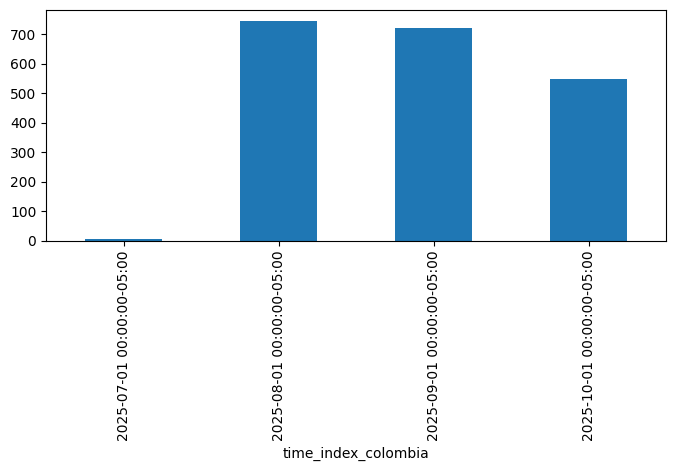

In [24]:
#Variable datetime
df.set_index('time_index_colombia').resample('MS').size().plot(kind='bar', figsize=(8,3))

In [25]:
df.columns

Index(['time_index_colombia', 'entity_id', 'v1', 'activeenergyimport', 'v2',
       'relativethdvoltage', 'totalpowerfactor', 'activepower',
       'reactiveenergyimport', 'reactiveenergyexport', 'v3',
       'relativethdcurrent', 'reactivepower'],
      dtype='object')

<Axes: >

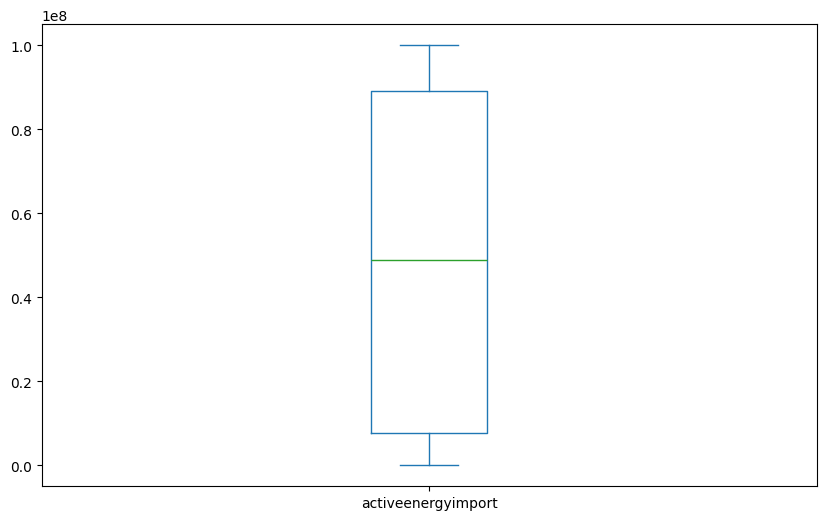

In [26]:
#Variables numéricas
df['activeenergyimport'].plot(kind='box', figsize=(10,6))

<Axes: >

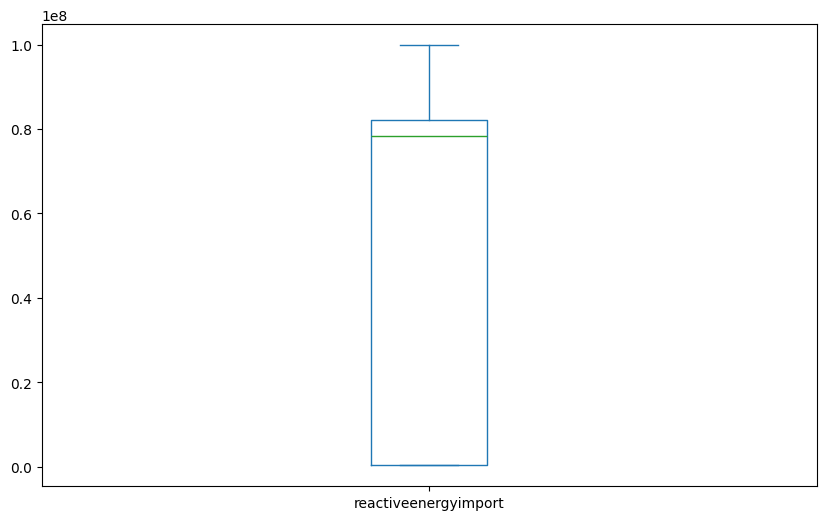

In [27]:
df['reactiveenergyimport'].plot(kind='box', figsize=(10,6))

<Axes: >

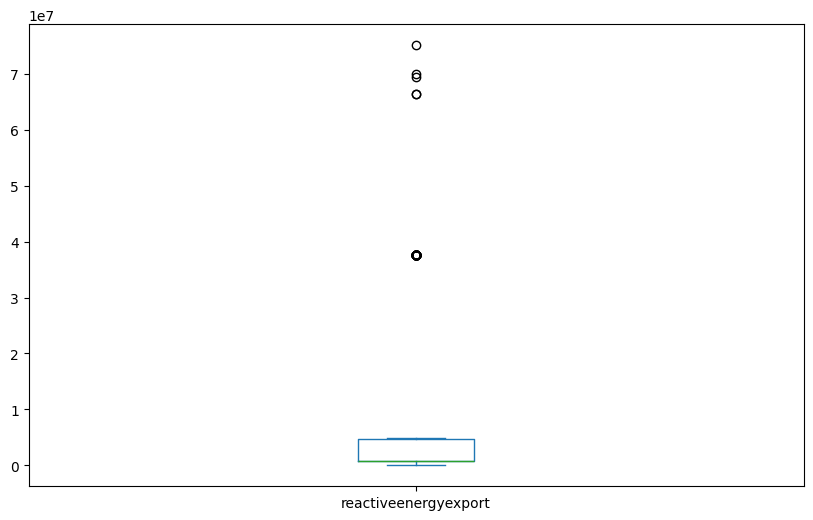

In [28]:
df['reactiveenergyexport'].plot(kind='box', figsize=(10,6))

<Axes: >

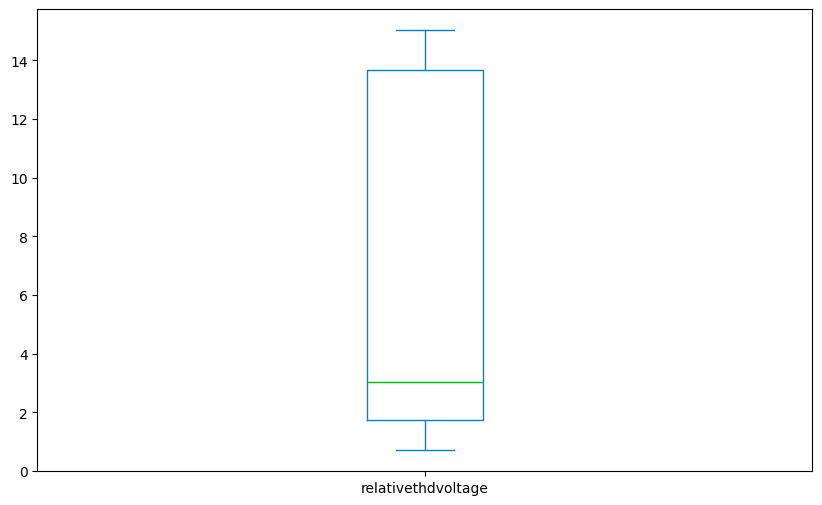

In [29]:
df['relativethdvoltage'].plot(kind='box', figsize=(10,6))

<Axes: >

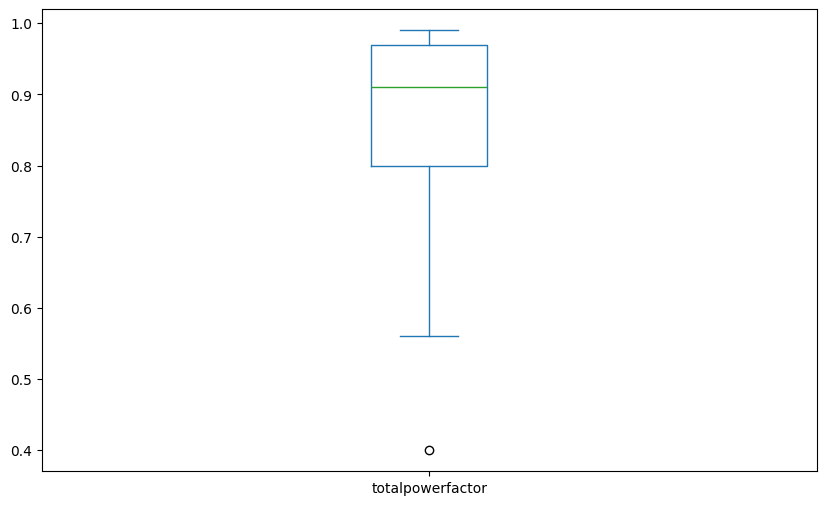

In [30]:
df['totalpowerfactor'].plot(kind='box', figsize=(10,6))

<Axes: >

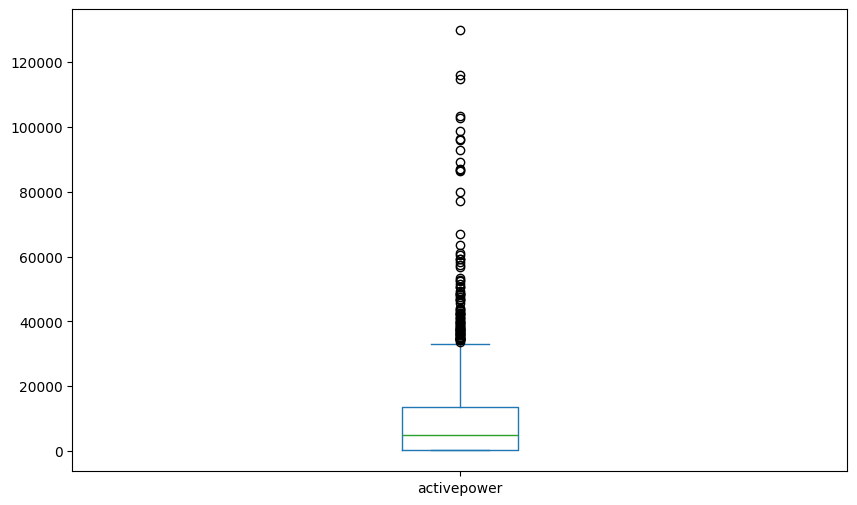

In [31]:
df['activepower'].plot(kind='box', figsize=(10,6))

<Axes: >

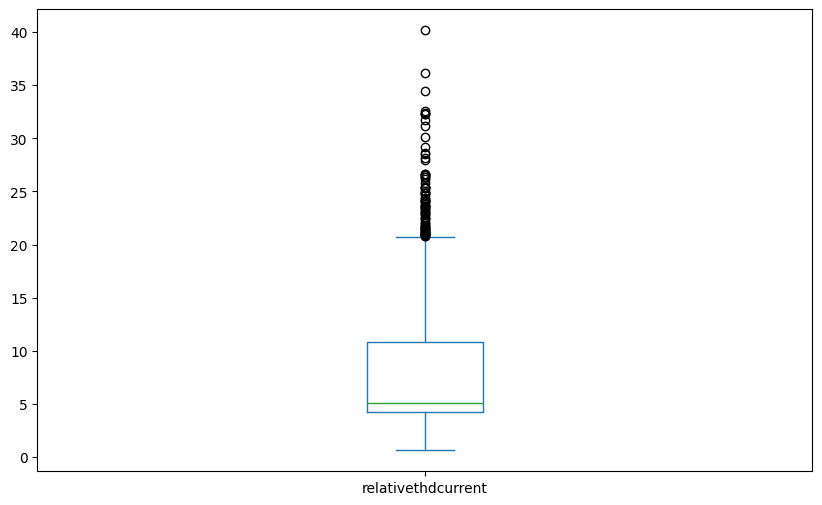

In [32]:
df['relativethdcurrent'].plot(kind='box', figsize=(10,6))

<Axes: >

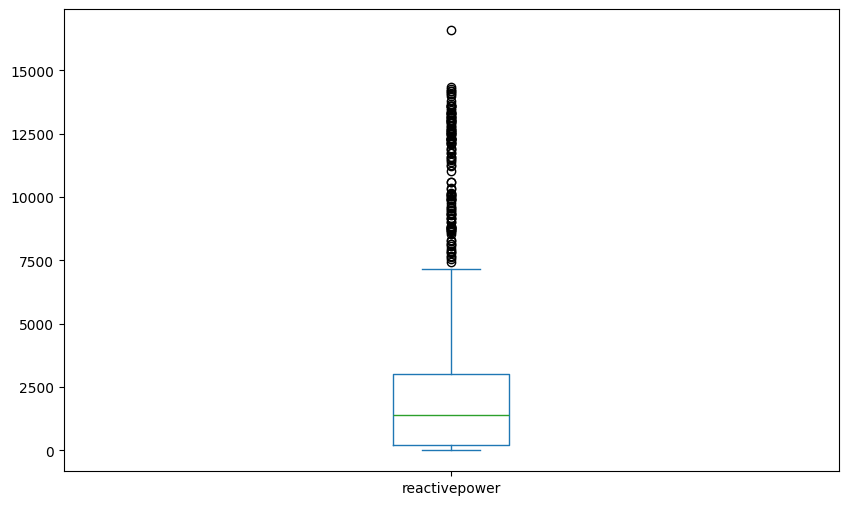

In [33]:
df['reactivepower'].plot(kind='box', figsize=(10,6))

<Axes: >

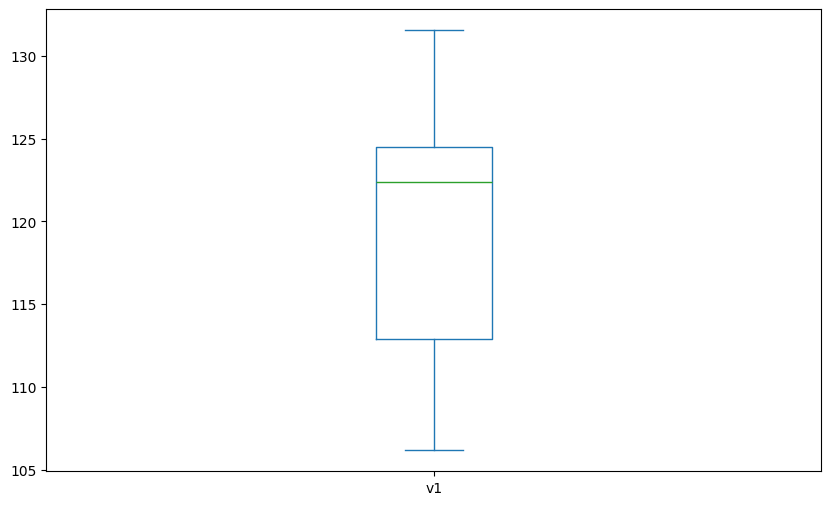

In [34]:
df['v1'].plot(kind='box', figsize=(10,6))

<Axes: >

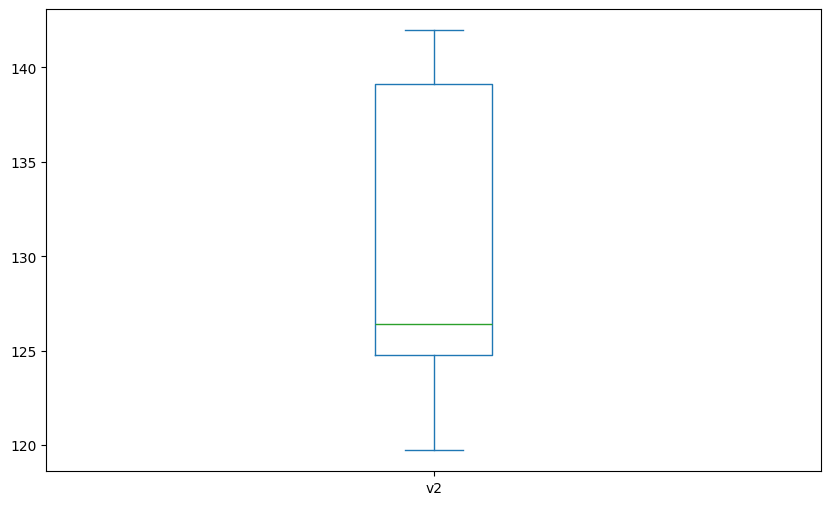

In [35]:
df['v2'].plot(kind='box', figsize=(10,6))

<Axes: >

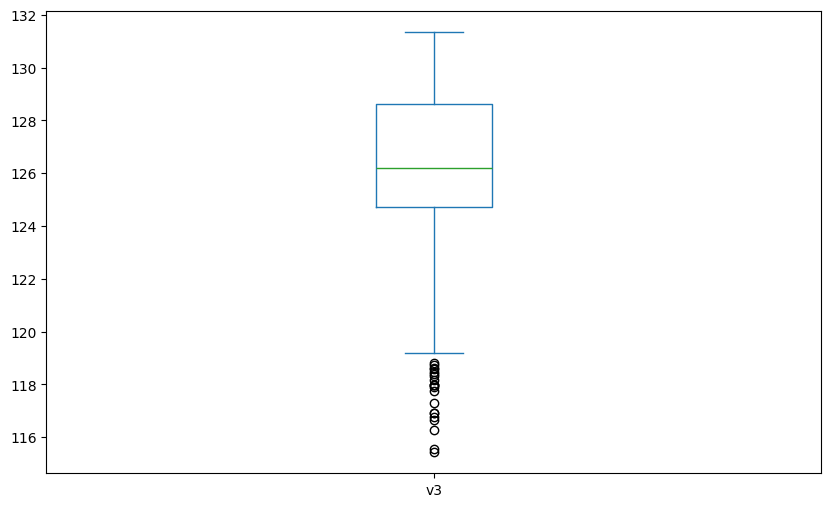

In [36]:
df['v3'].plot(kind='box', figsize=(10,6))

#### 2.2. Data Profiling

In [37]:
# Cargar librería para Profiling
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [38]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(df, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 101.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Base de datos para clustering de series de tiempo